# Twitter EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

In [2]:
df = pd.read_csv('../Data/twitter_states_cleaned_2014_19.csv')
df.head()

,tweet,location,user_name,time_stamp,num_retweets,num_likes,tweet_word_count,port_tweet,time_location
0,cheerleaders working during the blackout clare...,Alabama,OD_Slaughter,2016-10-04 16:54:34,0,0,13,cheerlead work dure the blackout clarenc high ...,2016-10-04 16:00:00 | Alabama
1,it s spooky season,Alabama,OMGItsBlackout,2019-10-31 18:17:20,0,0,3,it s spooki season,2019-10-31 18:00:00 | Alabama
2,newsom raked in big money from public utility ...,Alabama,deenie7940,2019-10-31 13:58:11,0,0,19,newsom rake in big money from public util he i...,2019-10-31 13:00:00 | Alabama
3,hope you don t live in certain areas of califo...,Alabama,LarryGreer20,2019-10-30 19:46:29,0,2,19,hope you don t live in certain area of califor...,2019-10-30 19:00:00 | Alabama
4,lmao nigga gone blackout off one,Alabama,YUNGINOJAWBREAK,2019-10-30 18:52:13,0,0,8,lmao nigga gone blackout off one,2019-10-30 18:00:00 | Alabama


In [3]:
custom_stop_words = ['just', 'like', 'don', 'blackout', 'blackouts', 'power', 'outage', 'power outage', 'got',
                    'new', 'york', 'nyc', 'going', 'california', 'manhattan']
master_stop_words = custom_stop_words + (list(stop_words.ENGLISH_STOP_WORDS))

In [4]:
cvec = CountVectorizer(ngram_range=(1,2),
                       stop_words=master_stop_words, 
                       min_df=2,
                       max_df=.99,
                       token_pattern="[A-Za-z0-9,&']{2,}"
                       # this regex code keeps ampersands, commas, and single quotes to keep abbreviated words, 
                       # numbers with commas, and letters linked together with an '&' all together while still
                       # eliminating single characters
                      )
tweet_cvec_array = cvec.fit_transform(df['tweet'])

In [5]:
cvec_df = pd.DataFrame(tweet_cvec_array.toarray(), columns=cvec.get_feature_names())
cvec_df.head()

,&&,&you,&you listen,00,00 00,00 bxsports,00 pm,000,000 acres,000 californians,...,zombie apocalypse,zombies,zone,zones,zoo,zuckerberg,zumba,zumba book,zzzzzzzzzz,zzzzzzzzzz gwin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


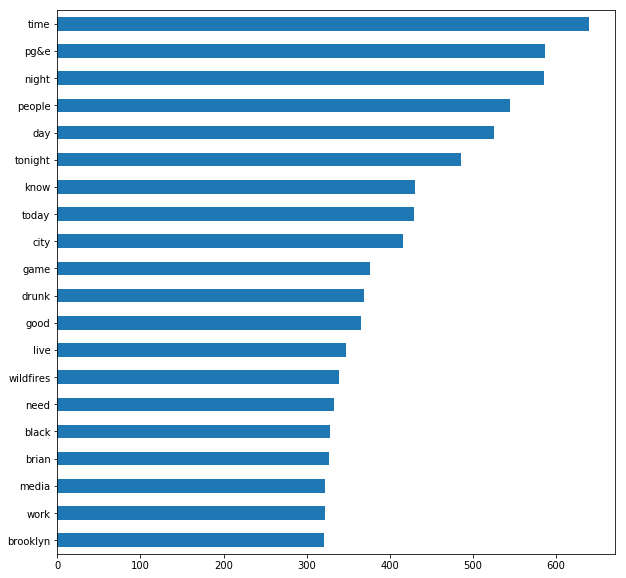

In [6]:
plt.figure(figsize=(10,10))
cvec_df.sum().sort_values().tail(20).plot.barh();